<a href="https://colab.research.google.com/github/HKang42/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Harrison_Kang_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Get data

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

cols=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv(url, names = cols)

In [2]:
# replace string values with numeric ones

df = df.replace({"y" : 1, "n" : 0, "?" : np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


**Generate and numerically represent a confidence interval**

In [0]:
def conf_int(sample, confidence, truncate = True):

  # convert sample to array
  sample = np.array(sample)
  
  # get sameple size
  n = len(sample)

  # calculate degrees of freedom
  DoF = n-1

  # calculate mean of sample
  mean = np.mean(sample)

  # calculate standard deviation of sample
  std_dev = np.std(sample, ddof=1)
  
  # calculate standard error given standard dev. and sample size
  std_err = std_dev / np.sqrt(n)

  # get t-value given desired confidence level and degrees of freedom
  t = stats.t.ppf( (1 + confidence) / 2.0, DoF)

  # calculate margin of error
  margin_of_error = std_err * t

  # calculate upper and lower bounds
  upper = mean + margin_of_error
  lower = mean - margin_of_error

  # truncate values
  if truncate == True:
  
    mean = round(mean,3)
    upper = round(upper, 3)
    lower = round(lower, 3)
    margin_of_error = round(margin_of_error,3)

  return mean, upper, lower, margin_of_error

In [0]:
# pick the desired issue

issue = 'immigration'
sample = df[issue].dropna()

In [8]:
# pick desired confidence level and generate results

confidence = 0.95

results = conf_int(sample, confidence)

print("The mean vote for", issue, "is: \t", results[0])

print("The margin of error is:\t", results[3])

print("The upper bound is:\t", results[1])

print("The lower bound is:\t", results[2])

The mean vote for immigration is: 	 0.505
The margin of error is:	 0.048
The upper bound is:	 0.552
The lower bound is:	 0.457


**Graphically (with a plot) represent the confidence interval**

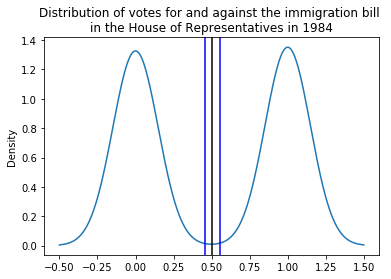

In [6]:
df[issue].plot.density()

graph_title = str("Distribution of votes for and against the " + issue + " bill \nin the House of Representatives in 1984")

plt.title(graph_title)

plt.axvline(x=results[1], color='blue')
plt.axvline(x=results[0], color='black')
plt.axvline(x=results[2], color='blue');

plt.show()

**Interpret the confidence interval - what does it tell you about the data and its distribution?**

The mean vote for the immigration bill is 0.505 with a margin of error of 0.048 and upper and lower bounds of 0.552 and 0.457 respectively.

We can be 95% confident that the true mean falls within the upper and lower bounds. Given how centered the bounds are around 0.5, this means that support for the bill is largely the same from both sides (i.e. support is not heavily partisan).

**Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data**
- By hand using Numpy

In [58]:
# Grab data from the adult data set 

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [59]:
# let's look for categorical data with a low number of categories

num_categories = 5

for name in df.columns:
  
  if len(df[name].value_counts()) <= num_categories:
    print (name)

race
sex
salary


In [60]:
# Let's use sex and salary

# Create contingency table

contingency = pd.crosstab(df['sex'], df['salary'], margins=True)

contingency

salary,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [0]:
# get totals 

row_totals = contingency.iloc[0:-1,-1].values

col_totals = contingency.iloc[-1, 0:-1].values

total_total = contingency.iloc[-1, -1]

In [62]:
print("Row Totals:" ,row_totals)

print("Col Totals:", col_totals)

print("Total values", total_total)

Row Totals: [10771 21790]
Col Totals: [24720  7841]
Total values 32561


In [85]:
# created expected frequency table
# divide each columns total by each row total and divide by the total number of observations

expected = []

for i in range(0, len(row_totals)):
  expected_row = []

  for column in col_totals:

    expected_val = column * row_totals[i] / total_total
    expected_row.append(expected_val)

  expected.append(expected_row)


expected = np.array(expected)

print(expected)

[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [86]:
# Get the contingency table (observed value table) without the margins

observed = pd.crosstab(df['sex'], df['salary'])

observed

salary,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [87]:
# calculate chi squared value

chi_squared = ((observed - expected)**2/(expected)).values.sum()
print( "Chi Squared:", chi_squared)

Chi Squared: 1518.8868199570722


**Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data**
- In a single line using Scipy

In [89]:
results = stats.chi2_contingency(observed)

print("Chi Squared:\t", results[0])
print("p-value:\t", results[1])
print("DoF:\t\t", results[2])
print("Expected:\n", results[3])

Chi Squared:	 1517.813409134445
p-value:	 0.0
DoF:		 1
Expected:
 [[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)